<a href="https://colab.research.google.com/github/Naitik582/FUTURE_DS_02/blob/main/Customer_Support_Data_Analysis_%26_Tickets_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving customer_support_tickets.csv to customer_support_tickets (1).csv


In [24]:
import pandas as pd

df = pd.read_csv("customer_support_tickets.csv")

print(df.head(2))

   Ticket ID  Customer Name              Customer Email  Customer Age  \
0          1  Marisa Obrien  carrollallison@example.com            32   
1          2   Jessica Rios    clarkeashley@example.com            42   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibility   

                                  Ticket Description  \
0  I'm having an issue with the {product_purchase...   
1  I'm having an issue with the {product_purchase...   

               Ticket Status Resolution Ticket Priority Ticket Channel  \
0  Pending Customer Response        NaN        Critical   Social media   
1  Pending Customer Response        NaN        Critical           Chat   

   First Response Time Time to Resolution  Customer Satisfaction Rating  


In [10]:
df['Ticket Description'] = df.apply(
    lambda row: str(row['Ticket Description']).replace("{product_purchased}", row['Product Purchased']),
    axis=1
)

In [11]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

df['Resolution Time (Hrs)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

In [12]:
print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
Resolution Time (Hrs)           5700
dtype: int64


In [13]:
top_issues = df['Ticket Subject'].value_counts().head(5)
print("Top 5 Issues:")
print(top_issues)

Top 5 Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Name: count, dtype: int64


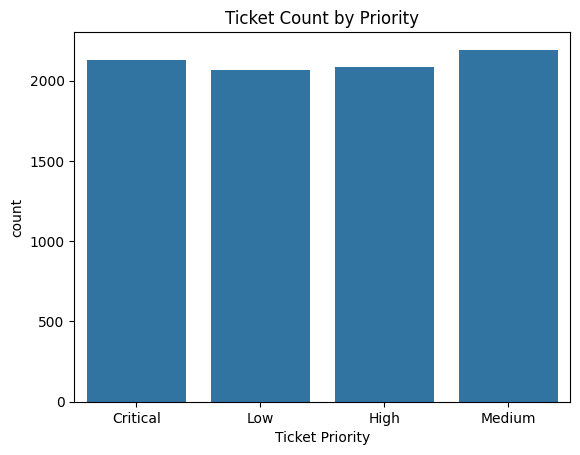

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Ticket Priority')
plt.title("Ticket Count by Priority")
plt.show()

In [15]:
print("\n--- SUMMARY REPORT ---")
print("Most Frequent Issues:")
print(top_issues)

print("\nAverage Resolution Time (Hours):")
print(df['Resolution Time (Hrs)'].mean())

print("\nSuggestions to Improve Response Time:")
print("- Create quick-response templates for top issues.")
print("- Assign high priority to 'Technical issues' with critical tags.")
print("- Automate FAQs for common subjects like 'Product setup' and 'Account access'.")


--- SUMMARY REPORT ---
Most Frequent Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Name: count, dtype: int64

Average Resolution Time (Hours):
-0.05770434573251475

Suggestions to Improve Response Time:
- Create quick-response templates for top issues.
- Assign high priority to 'Technical issues' with critical tags.
- Automate FAQs for common subjects like 'Product setup' and 'Account access'.
